<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/02_Definindo_intervalos%2C_calculando_e_plotando_m%C3%A9dias_m%C3%B3veis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

!pip install --upgrade mplfinance
import mplfinance as mpf

#!pip install mpl_finance --upgrade --no-cache-dir
#from mpl_finance import candlestick_ohlc

obtendo os dados do mercado

In [11]:
ticket = yf.Ticker('USIM5.SA')
#ibov = web.get_data_yahoo(ticket)
#print(ibov.shape)
##print(ticket.info)
data = ticket.history(period='300d')
data
data.columns = map(str.lower, data.columns)
data

,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
2020-09-28,9.687412,9.883778,9.472344,9.481695,18642700,0.0,0
2020-09-29,9.444292,9.621957,9.145067,9.210523,17207000,0.0,0
2020-09-30,9.369486,9.771569,9.238574,9.378836,26161500,0.0,0
2020-10-01,9.397539,9.584554,9.210523,9.416240,14306100,0.0,0
2020-10-02,9.322732,9.528448,9.182469,9.369486,13012700,0.0,0
...,...,...,...,...,...,...,...
2021-12-09,14.800000,14.980000,14.420000,14.940000,14502500,0.0,0
2021-12-10,15.080000,15.670000,15.050000,15.210000,15354300,0.0,0
2021-12-13,15.480000,15.820000,15.230000,15.390000,16274300,0.0,0


In [37]:
#média aritmetica
mma21 = pd.DataFrame()
mma21['close'] = data['close'].rolling(window=21).mean()
mma200 = pd.DataFrame()
mma200 = data.close.rolling(200).mean()
#media exponencial
mme9 = pd.DataFrame()
mme9 = data.close.ewm(9).mean()

In [27]:
# Calculating the average of volue of window of 50 days
VOL50 = pd.DataFrame()
VOL50['volume'] = data['volume'].rolling(window=50).mean()

# Calculating the average of volue of window of 15 days average
VOL15 = pd.DataFrame()
VOL15['volume'] = data['volume'].rolling(window=15).mean()

In [38]:
mma21

,close
Date,
2020-09-28,NaN
2020-09-29,NaN
2020-09-30,NaN
2020-10-01,NaN
2020-10-02,NaN
...,...
2021-12-09,13.579524
2021-12-10,13.700476
2021-12-13,13.792381


In [ ]:
# Function that tells you when to sell/buy
def buy_sell(data):
    sigBuy = []
    sigSell = []
    flag = -1
    for i in range(len(data)):
        # GOLDEN CROSS & VOL50 > VOL200
        ##if ((data['SMA30'][i] > data['SMA100'][i]) and (data['VOL15'][i] > data['VOL50'][i])):
        if ((data['mme9'][i] > data['SMA100'][i]) and (data['VOL15'][i] > data['VOL50'][i])):
            if flag != 1:
                sigBuy.append(data['AAPL'][i])
                sigSell.append(np.nan)
                flag = 1
            else:
                sigBuy.append(np.nan)
                sigSell.append(np.nan)
        # DEATH CROSS
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                sigBuy.append(np.nan)
                sigSell.append(data['AAPL'][i])
                flag = 0 
            else:
                sigBuy.append(np.nan)
                sigSell.append(np.nan)
        else:
            sigBuy.append(np.nan)
            sigSell.append(np.nan)
    return [sigBuy, sigSell]

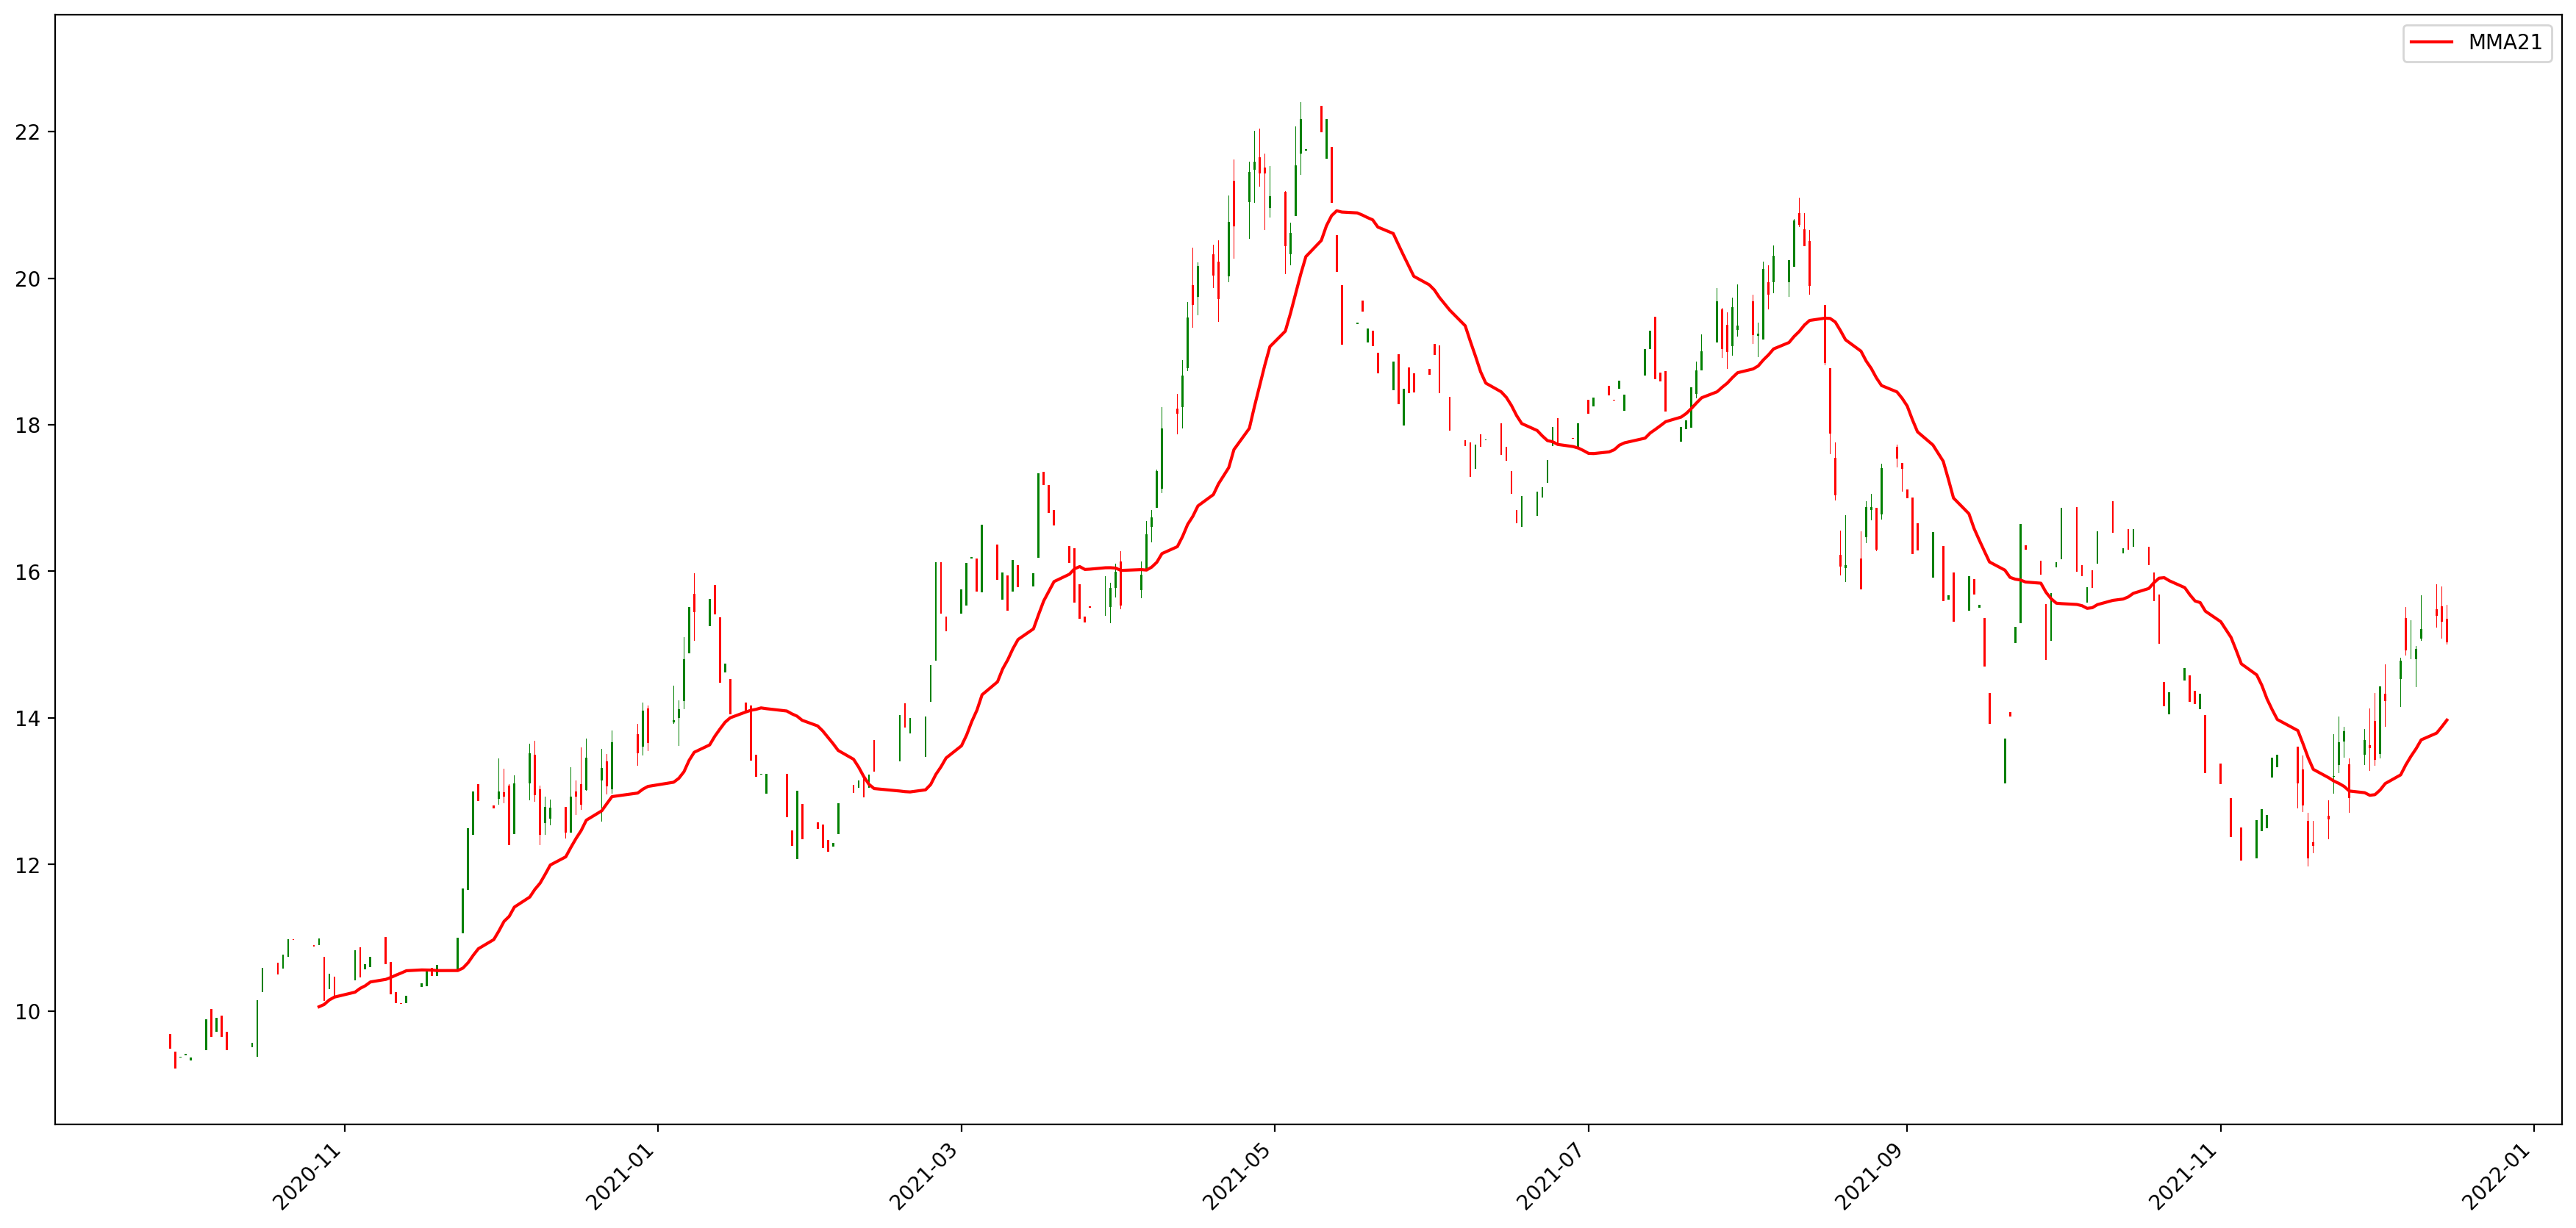

In [40]:
#create figure
plt.figure(figsize=(22,10),dpi=200)

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = data[data.close>=data.open]
down = data[data.close<data.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')


#média aritmetica
plt.plot(mma21['close'], label="MMA21", color="red")
mma200 = mma200.plot(label="MMA200", color="darkgreen")
#media exponencial
mme9 = mme9.plot(label="MME9", color="green")



#legenda
plt.legend()

#display candlestick chart
plt.show()


# 
##plt.fill( data.close.rolling(21).mean() , data.close.ewm(9).mean())
#plt.fill (mma21,mme9)




In [ ]:


data["Close"].plot(figsize=(24,8),label="IBOV")
data["Close"].rolling(21).mean().plot(label="MM21")
data["Close"].rolling(200).mean().plot(label="MM200")
data['Close'].ewm(9).mean().plot(label="EWM9")
plt.legend()


In [ ]:
mpf.plot(data,type='candle',mav=(20, 200),volume=True,style='yahoo')

In [ ]:
ibov_fatiado = ibov[ibov.index.year == 2020]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()

In [ ]:
ibov_fatiado = ibov[(ibov.index.year >= 2015) & (ibov.index.year <= 2017)]
ibov_fatiado["Close"].plot(figsize=(22,8),label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend()